### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Load Dataset

In [2]:
# Memuat dataset dari CSV
data = pd.read_csv(r'C:\Users\User\Downloads\Data Mining\Estimasi_Regresi Linier\StudentsPerformance.csv')  # Gantilah dengan path dataset yang benar

In [3]:
df = data

In [4]:
# Menampilkan informasi dat
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3. Memeriksa Tipe Data dan Nilai yang Hilang

Selanjutnya, periksa tipe data dari setiap kolom dan apakah ada nilai yang hilang.

In [5]:
# Memeriksa tipe data
print(data.dtypes)

# Memeriksa nilai yang hilang
print(data.isnull().sum())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### 4. Mengonversi Kolom Kategorikal Menjadi Numerik

Kita perlu mengubah kolom-kolom kategorikal menjadi numerik menggunakan LabelEncoder.

In [6]:
# Inisialisasi LabelEncoder
label_encoders = {}

# Mengubah data kategorikal menjadi numerik
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))  # Mengonversi ke string jika perlu
    label_encoders[column] = le  # Menyimpan encoder jika diperlukan untuk prediksi di masa mendatang

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


### 5. Memilih Fitur dan Target

Tentukan fitur yang akan digunakan untuk prediksi dan target yang akan diprediksi.

In [8]:
# Memilih fitur dan target
X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']]
y = data['math score']

### 6. Membagi Data Menjadi Data Latih dan Data Uji

Bagi dataset menjadi data latih dan data uji menggunakan train_test_split.

In [9]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7. Melatih Model

Sekarang kita dapat melatih model. Dalam contoh ini, kita akan menggunakan model regresi linier.

In [10]:
# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 8. Melakukan Prediksi

Setelah model dilatih, kita dapat melakukan prediksi pada data uji.

In [11]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

### 9. Evaluasi Model

Akhirnya, kita akan mengevaluasi kinerja model menggunakan Mean Squared Error (MSE) dan R² Score.

In [12]:
# Menghitung Mean Squared Error dan R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 28.275284506327317
R² Score: 0.8838026201112225


### 10. Visualisasi Hasil

Jika Anda ingin memvisualisasikan hasil prediksi, Anda bisa menggunakan matplotlib atau seaborn.

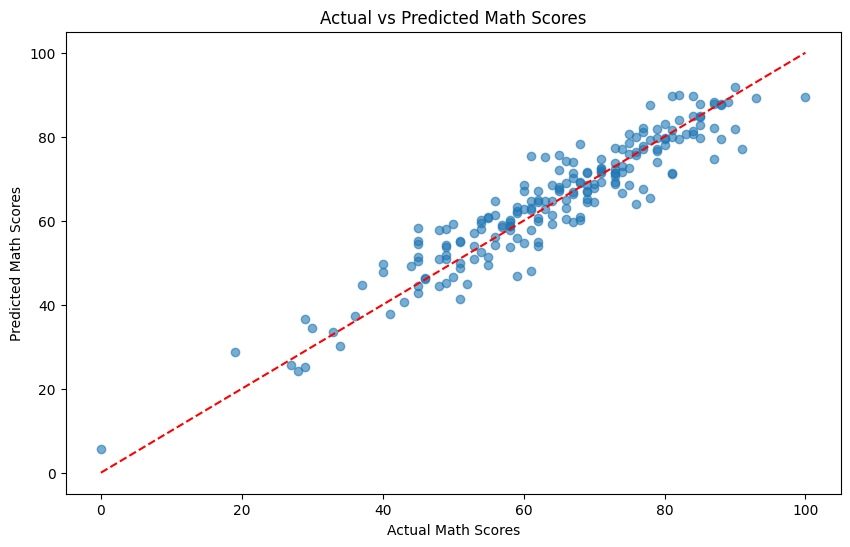

In [13]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Garis ideal
plt.title('Actual vs Predicted Math Scores')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.show()